## Plotting in OptiWindNet

This notebook explains the main plotting functions available for a `WindFarmNetwork (wfn)` instance. There are **five primary plots** which become available in different stages:


- Plots available **immediately after initialization** of the `wfn` object:

    - `wfn.plot_location()`
    → Visualizes turbine and substation locations, borders, and obstacles.

    - `wfn.plot_navigation_mesh()`
    → Shows the triangulated navigation mesh (planar embedding).

    - `wfn.plot_available_links()`
    → Displays all feasible cable routing edges, including direct and diagonal links.

- Plot available **after running the optimization** (`wfn.optimize()`):

    - `wfn.plot_selected_links()`
    → Shows the selected links in the optimized network (without detours)
    - `wfn.plot()`
    → Shows the final **optimized cable network** (including detours, i.e. rerouted links between substation and turbines in case of cable crossing)


---

### import required modules

In [45]:
from optiwindnet.api import WindFarmNetwork, load_repository

### Create a sample network
In this example, the `WindFarmNetwork` is initialized using `load_repository()` functionality. For more details on this functionality look at this notebook:  [included-locations.ipynb](api_02-included-locations.ipynb)

In [46]:
locations = load_repository()
wfn = WindFarmNetwork(L = locations.neart, cables=7)

## Plots
Initializing an intance of WindFarmNetwork() creates three graphs:
1. location (L)
2. navigation mesh (P)
3. available links (A)

Accordingly, the correspondant plots are available right after.

### Plot location (L):

It contains location data (coordinates, borders, obstacles) without any link/connection.

<Axes: >

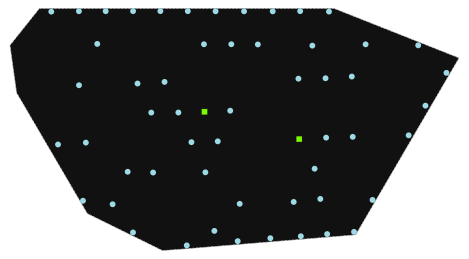

In [47]:
wfn.plot_location()

### Plot navigation mesh
The corresponding graph contains a mesh generated by **constrained Delaunay triangulation**, represented as a planar embedding—a graph that can be embedded in 2D without any edge crossings.

<Axes: >

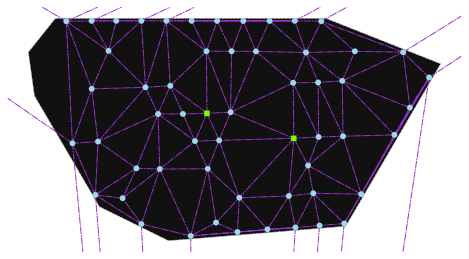

In [48]:
wfn.plot_navigation_mesh()

### Plot Available Links

The corresponding graph contains all **feasible cable routing links** derived from the **Constrained Delaunay triangulation**, and additional **diagonal routes**.

Links in the graph `A` that would violate the constraints (concavities, obstacles, etc) are **pruned or rerouted along contours**.

The available link graph (A) is the primary graph used by downstream algorithms for **optimization**.

---

`wfn.plot_available_links()`

This method plots the available links using different **line styles and colors** to distinguish link types:

* **Line format:**

  * **Solid lines**: direct Delaunay links
  * **Dashed lines**: diagonal or extended links

* **Line color:**

  * **Green**: unobstructed (valid) links
  * **Red**: obstructed links (e.g., crossing obstacles)

📌 *For a detailed explanation and visuals, see Figure 5 in the paper:*
**To be added: \[link to paper]**


<Axes: >

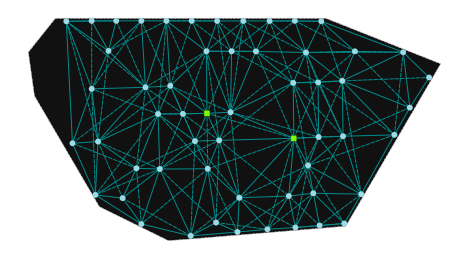

In [49]:
wfn.plot_available_links()

### Optimize

To plot and visualize the optimized cabling network, an optimization needs to be performed first. For the sake of simplicity, we run the optimization with the default router in optiwindnet (i.e. `Heuristics-Esau_Williams`).

In [50]:
res = wfn.optimize()

### Plot selected links
Selected links are the links selected in the optimized network from among available links (without any detour)

- This graph can be used as a warm start for future optimization runs (Final optimized network graph, stored in G, cannot be used for warmstaring due to potential detoured links which add new vertices to the graph).

<Axes: >

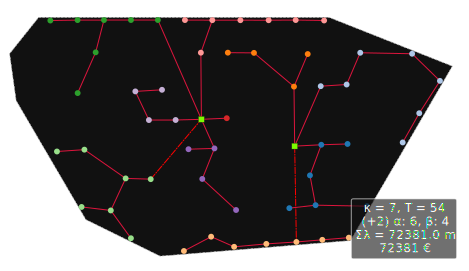

In [51]:
wfn.plot_selected_links()

### Plot the Optimized Network Graph
The optimized network graph (G) represents the final optimized cable network.

It includes:

- Only the edges selected in S

- Edge attributes such as:

    - 'length'

    - 'load'

    - 'cable' (cable type assigned based on capacity and cost)

    - 'cost' (computed from length and cable type)
    
If the selected links are not crossing, topology of final layout will be same as selected links. Otherwise, the crossings are resolved with detours.

<Axes: >

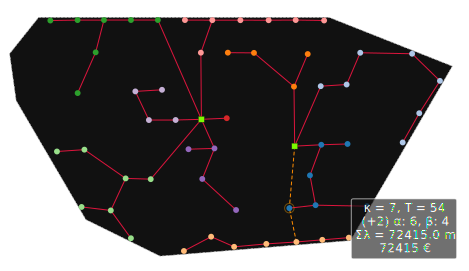

In [52]:
wfn.plot()

### Plot in a pre-existing axes

It is also possible to provide a pre-existing `plt.Axes` object within a matplotlib figure:

<Axes: >

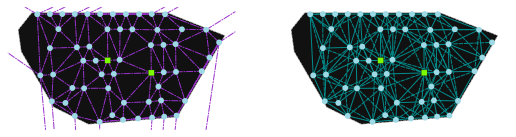

In [53]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
plt.rcParams['svg.fonttype'] = 'none'
fig, (ax1, ax2) = plt.subplots(1, 2, facecolor='none', figsize=(9, 3))

wfn.plot_navigation_mesh(ax=ax1)
wfn.plot_available_links(ax=ax2)

### Plotting properties

Plotting properties, such as node tags and legends, can be modified by the user.


In OptiWindNet, **node tags** (labels) are used to identify turbines and substations in plots and outputs. These tags can be:

- **Automatically generated** by OptiWindNet
- **Manually provided** via `.yaml` files
  *(Note: tags in `.pbf` files are currently **not** supported.)*


Tag Generation Logic of OptiWindNet is as follows:

1. For turbine nodes (non-negative indices):

    - Tags are generated using a **base-50 encoding** with a custom alphabet of 50 characters:
  `'abcdefghijkmnopqrstuvwxyzABCDEFGHJKLMNOPQRSTUVWXYZ'`
  (Digits `'I'` and `'l'` are skipped to avoid confusion.)
    - This produces tags such as: `'a'`, `'b'`, ..., `'Z'`, `'aa'`, `'ab'`, ..., up to `'ZZ'`.
    - With two characters, up to **2500 unique turbine tags** can be generated.
    - These are assigned in the **order the turbines appear** in the input.

2. For substations (negative indices):

    - Tags are assigned using **Greek lowercase letters** starting from `'α'` (`alpha`), `'β'`, `'γ'`, etc.

This logic allows easy distinction between turbines and substations in plots.

Note that:

- The default **circle (turbine)** and **rectangle (substation)** plot symbols are sized to fit **two-character tags** comfortably using the current font size.
- Therefore, it is **recommended to limit manual tags to two characters** when defining them in `.yaml` files.


<Axes: >

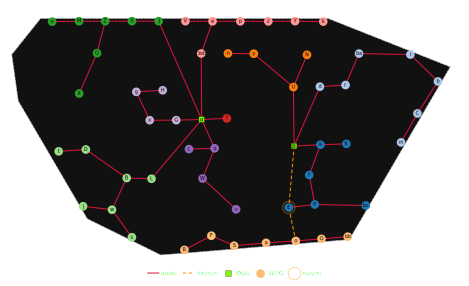

In [54]:
wfn.plot(node_tag='label', infobox=False, legend=True)

The nodes can also be tagged by the power they export towards the substation:

<Axes: >

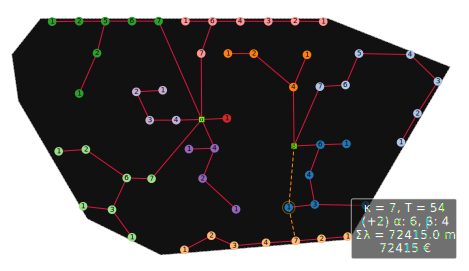

In [55]:
wfn.plot(node_tag='load')

### Theme of plots

The plots are visualized trying to match the colors used in the figure to the operating system's theme via Python package `darkdetect`. This package detects the system's theme and not JupyterLab's theme, so it may lead no non-ideal results if they do not match.

The example notebooks are created from a dark-themed system, but the figures might have a light background when the notebooks are run on a different computer.

The theme can be enforced programmatically by setting the argument `dark` to `True` or `False`:

<Axes: >

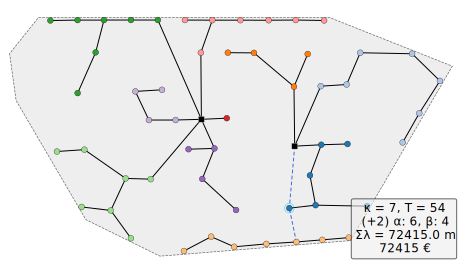

In [56]:
wfn.plot(dark=False)

### Rotated locations

Each location included in OptiWindNet has a graph attribute called 'landscape_angle'.

In [57]:
wfn.L.graph['landscape_angle']

59.70466114754597

This is the angle that will rotate the site to be in the best orientation for a landscape figure. If the user prefers the orientation to be with the north always up, the argument `landscape` can be used. Alternatively, 'landscape_angle' could be set to 0.

<Axes: >

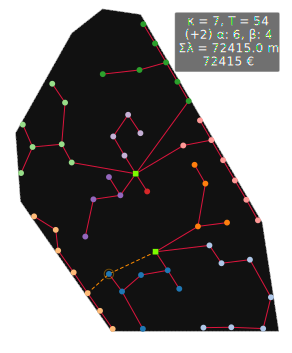

In [58]:
wfn.plot(landscape=False)